<a href="https://colab.research.google.com/github/EmilyB78/Titanic-Data-Analysis/blob/main/Titanic_Survivor_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

This project examines factors affecting survival among passengers aboard Titanic.

In [ ]:
survivor_data = pd.read_csv('titanic_data.csv')
survivor_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DISTRIBUTION PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


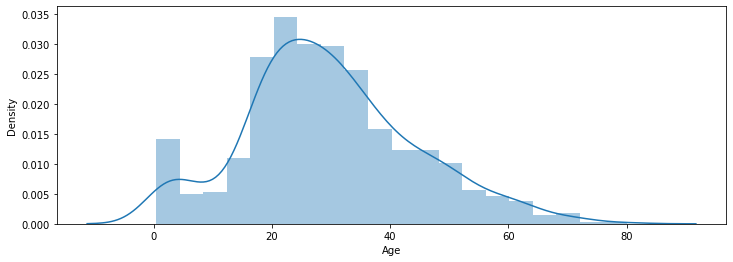

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

sns.distplot(survivor_data.Age, ax=ax)

SCATTER PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


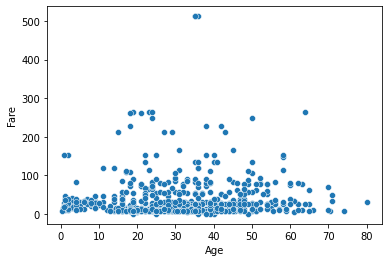

In [ ]:
sns.scatterplot ('Age', 'Fare', data=survivor_data)


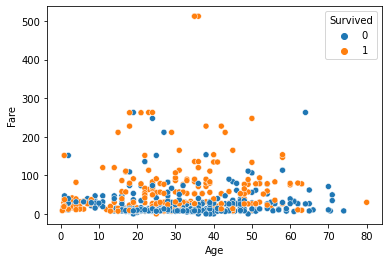

In [ ]:
sns.scatterplot(x='Age', y= 'Fare', data=survivor_data, hue= 'Survived')


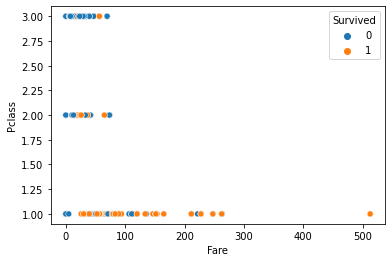

In [ ]:
sns.scatterplot(data=survivor_data,x='Fare',y='Pclass',hue='Survived')

Age and the cost of the passenger's fare does not appear to be related. However, those who paid a higher fare were more likely to survive.

BAR PLOT

Text(0.5, 1.0, 'Survival by Age and Gender')

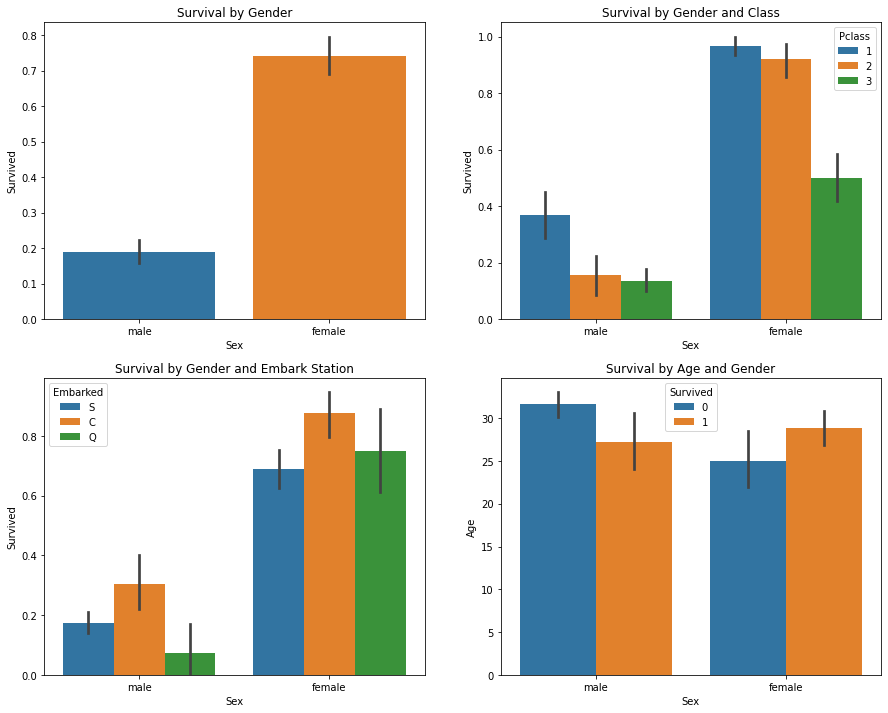

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[0,0])
axes[0,0].set_title ('Survival by Gender')

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[0,1], hue= 'Pclass')
axes[0,1].set_title('Survival by Gender and Class')

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[1,0], hue= 'Embarked')
axes[1,0].set_title('Survival by Gender and Embark Station')

sns.barplot(x='Sex', y= 'Age', data=survivor_data, ax=axes[1,1], hue= 'Survived')
axes[1,1].set_title('Survival by Age and Gender')


This analysis shows an interesting fact. Surival was strongly influenced by gender and passenger class. Women and those in lower passenger class (1st) were far more likely to survive. In examining the effect of age on survival, we see that the average age of male survivors was younger than decedents. The opposite is true among women.

The reasons for this are fairly obvious. Our analysis of the age of passengers per class indicates that those in first class tended to be older. This fits as these people were wealthier i.e. more established in life.

Women and first class passengers were give priority in lifeboats. Therefore, the fact that female survivors tended to be older than female victims is congruent.

Men, by contrast, were given lesser opportunities to escape. It was likely survival of the fittest for the last lifeboat spots, favoring younger men.

FACTOR PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


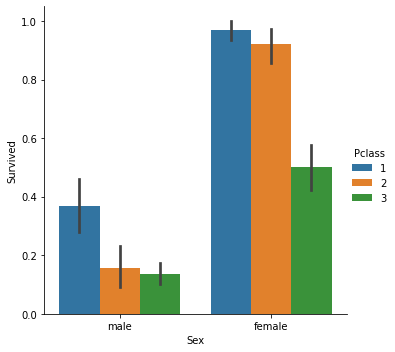

In [ ]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=survivor_data, kind='bar')

COUNT PLOT

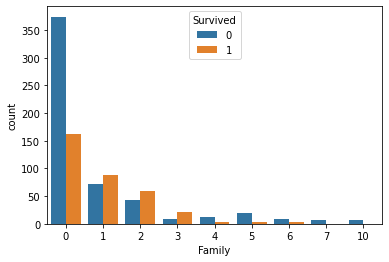

In [ ]:
companion_merge = survivor_data['Family'] = survivor_data['SibSp'] + survivor_data['Parch']


# run chart using combined category to assess everyone who was not traveling alone.
sns.countplot(x='Family',data=survivor_data, hue= 'Survived' )

We analyzed the data with regard to whether traveling with a companion(s) affected survival. There were comparatively few accompanied passengers and we can detect no obvious connection between these data points.

**Data Cleaning**

In [ ]:
survivor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Identifying Null Values

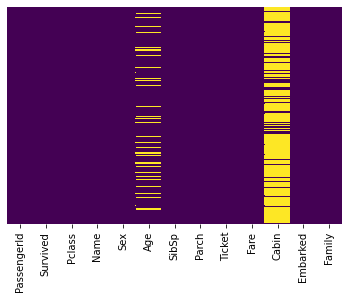

In [ ]:
sns.heatmap(survivor_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

A significant number of null values are located the age and cabin columns.

BOX PLOT

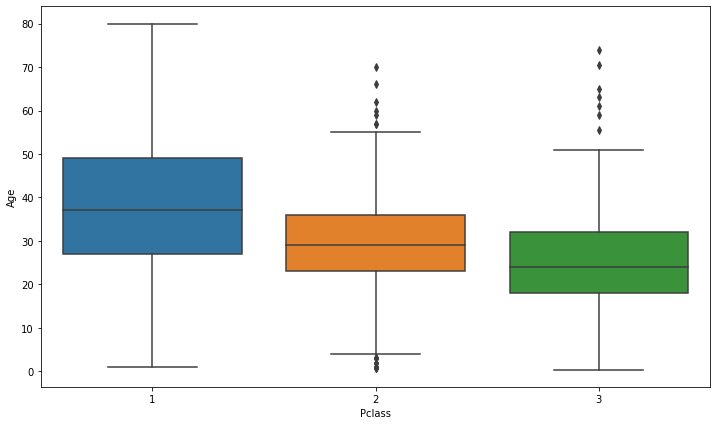

In [ ]:
plt.figure(figsize=(12,7))

sns.boxplot(x= 'Pclass', y= 'Age', data= survivor_data)

It appears that the average age of the passenger increases as the passenger class decreases. We will use the average age of the passenger class to fill in missing age data.

In [ ]:
survivor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
survivor_data[survivor_data['Pclass']==1]['Age'].mean()

38.233440860215055

In [ ]:
survivor_data[survivor_data['Pclass']==2]['Age'].mean()

29.88494565217391

In [ ]:
survivor_data[survivor_data['Pclass']==3]['Age'].mean()


24.82468431771894

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age


Repair missing age values in data with the average for that passenger class.

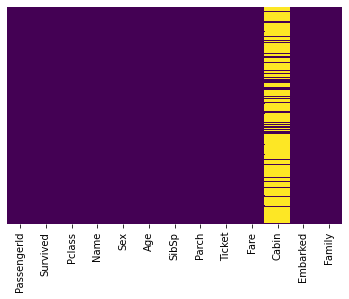

In [ ]:
sns.heatmap(survivor_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The Titanic sank in the early morning hours of April 15, 1912.The front starboard side of the ship collided with an iceberg. The accident ruptured 16 compartments at the waterline, causing the disaster.

The data has clearly demonstrated that the lower the passenger class, the more likely the individual was to survive. Cheaper quarters are generally 'lower' in the ship (i.e it was most likely second or third class compartments were flooded first).

We attempted to repair the cabin data through the use of the ticket number and/or passenger names. We were hoping to compare this data to a map of the ship. We expected to see a much lower survival rate for those located in cabins at or below the waterline on the front right of the ship.

We were unable to correlate ticket numbers with cabins. However, Encyclopedia Britannica provided a list of passenger names along with the individual's corresponding cabin. This data was reconstructed from personal accounts and a list retrieved from the body of the chief steward, Mr. Herbert Cave.

https://www.encyclopedia-titanica.org/cabins.html

Additionally, Encyclopedia Britannica provides maps of Titanic's decks with cabins clearly marked (available for download with subscription).

https://www.encyclopedia-titanica.org/titanic-deckplans/

We would like to expore combining the data with our existing information and compare to a map of the ship.

